In [1]:
from MRF import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_data.csv")

In [3]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), oos_pos=np.arange(150,200),trend_push=4,quantile_rate=0.3)

In [4]:
mrf_output = MRF._ensemble_loop()

Tree 0 out of 50


,0,1,2,3
0,-0.178018,0.537560,0.805957,0.784910
1,-0.051751,0.711792,0.796787,0.726139
2,-0.083322,0.708102,0.847930,0.650848
3,-0.083322,0.708102,0.847930,0.650848
4,-0.083322,0.708102,0.847930,0.650848
...,...,...,...,...
195,-0.051000,0.477343,0.629840,0.469253
196,-0.101872,0.516979,0.357760,0.230735
197,-0.073876,0.581855,0.434858,0.381192
198,0.026560,0.443912,0.433417,0.408486


/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:279: RuntimeWarning: divide by zero encountered in long_scalars
  self.avg_beta = ((b-1)/b)*np.array(self.avg_pred) + \
/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:280: RuntimeWarning: divide by zero encountered in long_scalars
  (1/b)*self.rt_output['pred']
/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:279: RuntimeWarning: invalid value encountered in add
  self.avg_beta = ((b-1)/b)*np.array(self.avg_pred) + \


Tree 1 out of 50


,0,1,2,3
0,-0.018846,0.528428,0.793665,0.680115
1,-0.018846,0.528428,0.793665,0.680115
2,-0.056377,0.766164,0.842452,0.715538
3,-0.056377,0.766164,0.842452,0.715538
4,-0.050952,0.753425,0.861976,0.699885
...,...,...,...,...
195,-0.006039,0.365198,0.411740,0.366965
196,-0.021785,0.438438,0.367095,0.179738
197,0.019821,0.453387,0.318063,0.315705
198,0.096723,0.367624,0.384286,0.383603


Tree 2 out of 50


,0,1,2,3
0,-0.030041,0.676924,0.860273,0.679595
1,-0.017259,0.677517,0.696997,0.561028
2,-0.030041,0.676924,0.860273,0.679595
3,-0.091838,0.712703,0.779606,0.706431
4,-0.052545,0.650695,0.881626,0.643846
...,...,...,...,...
195,0.148912,0.277002,0.411300,0.313376
196,-0.133052,0.388776,0.310981,0.384914
197,-0.133052,0.388776,0.310981,0.384914
198,0.082520,0.468124,0.350550,0.393918


Tree 3 out of 50


,0,1,2,3
0,0.012927,0.645842,0.788605,0.542696
1,-0.064860,0.712401,0.774861,0.701137
2,-0.152968,0.757614,0.882017,0.790114
3,-0.107159,0.706091,0.778183,0.772729
4,-0.080767,0.707398,0.835183,0.647508
...,...,...,...,...
195,0.095891,0.377334,0.314126,0.381381
196,-0.175702,0.575227,0.114972,0.242142
197,-0.175702,0.575227,0.114972,0.242142
198,0.080317,0.364190,0.324556,0.370138


Tree 4 out of 50


,0,1,2,3
0,0.042210,0.509027,0.780396,0.786062
1,-0.077762,0.699586,0.827949,0.729778
2,-0.077762,0.699586,0.827949,0.729778
3,-0.211539,0.597605,0.565082,0.366412
4,-0.067015,0.746214,0.817140,0.777361
...,...,...,...,...
195,0.063307,0.377493,0.394945,0.365215
196,0.053490,0.376617,0.344863,0.200418
197,0.053490,0.376617,0.344863,0.200418
198,-0.004650,0.499110,0.277643,0.294318


Tree 5 out of 50


,0,1,2,3
0,-0.037463,0.620200,0.853864,0.633106
1,0.007946,0.430836,0.780911,0.750120
2,0.033038,0.709725,0.870064,0.761556
3,-0.048172,0.696154,0.852719,0.783140
4,-0.144342,0.736975,0.746728,0.794074
...,...,...,...,...
195,0.024889,0.448251,0.427028,0.333263
196,0.079291,0.393898,0.403149,0.322480
197,0.030979,0.412445,0.386333,0.353968
198,0.067602,0.397989,0.407832,0.389143


Tree 6 out of 50


,0,1,2,3
0,-0.062453,0.709278,0.778165,0.790492
1,-0.002902,0.737948,0.847287,0.736963
2,-0.002902,0.737948,0.847287,0.736963
3,-0.021899,0.533766,0.760223,0.590098
4,-0.037637,0.688334,0.809468,0.687684
...,...,...,...,...
195,0.145848,0.368320,0.302970,0.441676
196,-0.124748,0.541646,0.525304,0.341952
197,-0.124748,0.541646,0.525304,0.341952
198,-0.097125,0.544705,0.552061,0.353426


Tree 7 out of 50


,0,1,2,3
0,-0.045160,0.705564,0.890954,0.709367
1,-0.079797,0.624299,0.887902,0.755818
2,-0.045160,0.705564,0.890954,0.709367
3,-0.042245,0.747384,0.921506,0.738540
4,-0.011943,0.739443,0.859240,0.649431
...,...,...,...,...
195,-0.005464,0.383569,0.439449,0.343325
196,-0.005464,0.383569,0.439449,0.343325
197,0.058915,0.538414,0.647607,0.325424
198,0.063148,0.390645,0.336950,0.248317


Tree 8 out of 50


,0,1,2,3
0,0.031371,0.594345,0.870470,0.559087
1,-0.091384,0.710470,0.898464,0.708306
2,-0.085200,0.765886,0.844136,0.717416
3,-0.085200,0.765886,0.844136,0.717416
4,0.018388,0.592616,0.835920,0.582289
...,...,...,...,...
195,-0.083248,0.525146,0.627309,0.338264
196,0.048413,0.456257,0.571310,0.394014
197,0.050028,0.612357,0.374235,0.415149
198,-0.109172,0.478738,0.550972,0.176229


Tree 9 out of 50


,0,1,2,3
0,-0.056330,0.649738,0.787012,0.507210
1,0.025999,0.708301,0.744767,0.580043
2,0.008224,0.676860,0.870370,0.696543
3,0.008224,0.676860,0.870370,0.696543
4,-0.116467,0.601991,0.877392,0.688975
...,...,...,...,...
195,-0.033193,0.404718,0.449715,0.294053
196,0.056336,0.310028,0.428019,0.342061
197,0.121566,0.317255,0.356133,0.334225
198,0.102006,0.410832,0.363314,0.319981


Tree 10 out of 50


,0,1,2,3
0,-0.040135,0.680612,0.916081,0.625189
1,-0.111333,0.768002,0.889087,0.740318
2,-0.089508,0.657302,0.842041,0.680759
3,-0.163093,0.474008,0.781929,0.643576
4,-0.111333,0.768002,0.889087,0.740318
...,...,...,...,...
195,0.073348,0.372354,0.487419,0.296469
196,0.092977,0.257208,0.383199,0.287787
197,-0.033799,0.447758,0.369687,0.257300
198,0.080845,0.441919,0.391456,0.387497


Tree 11 out of 50


,0,1,2,3
0,-0.035630,0.539833,0.820688,0.675077
1,-0.178277,0.586922,0.345583,-0.120702
2,-0.118907,0.733815,0.783866,0.733839
3,-0.069787,0.753298,0.870711,0.757674
4,-0.069787,0.753298,0.870711,0.757674
...,...,...,...,...
195,0.007753,0.382692,0.322549,0.305479
196,0.029221,0.490720,0.453530,0.418791
197,0.007753,0.382692,0.322549,0.305479
198,0.023111,0.370135,0.344149,0.438964


Tree 12 out of 50


,0,1,2,3
0,-0.004363,0.697036,0.867008,0.724292
1,-0.004363,0.697036,0.867008,0.724292
2,-0.004363,0.697036,0.867008,0.724292
3,-0.079504,0.757259,0.875532,0.720542
4,-0.004363,0.697036,0.867008,0.724292
...,...,...,...,...
195,0.017310,0.474198,0.360257,0.316078
196,0.119623,0.431449,0.417639,0.363233
197,0.119623,0.431449,0.417639,0.363233
198,0.119623,0.431449,0.417639,0.363233


Tree 13 out of 50


,0,1,2,3
0,0.032051,0.685761,0.834897,0.558683
1,-0.171257,0.792801,0.752707,0.765329
2,-0.095693,0.672823,0.765186,0.673711
3,-0.095693,0.672823,0.765186,0.673711
4,0.106861,0.666434,0.868564,0.641678
...,...,...,...,...
195,0.034197,0.439426,0.355531,0.270404
196,0.157301,0.267351,0.435908,0.308081
197,-0.007995,0.468421,0.354607,0.299785
198,0.002377,0.365410,0.419843,0.258173


Tree 14 out of 50


,0,1,2,3
0,0.030494,0.530896,0.792759,0.702425
1,-0.084306,0.790824,0.721184,0.621610
2,-0.140898,0.717171,0.819595,0.759798
3,-0.140898,0.717171,0.819595,0.759798
4,-0.046776,0.668617,0.843184,0.689030
...,...,...,...,...
195,0.104481,0.342057,0.437712,0.318270
196,0.047252,0.440007,0.433926,0.353070
197,0.047252,0.440007,0.433926,0.353070
198,0.104481,0.342057,0.437712,0.318270


Tree 15 out of 50


,0,1,2,3
0,-0.065650,0.728010,0.821519,0.667888
1,-0.042636,0.779712,0.731596,0.620772
2,-0.039252,0.721582,0.912406,0.765202
3,-0.059905,0.526474,0.853367,0.636646
4,-0.093364,0.726773,0.812744,0.722898
...,...,...,...,...
195,-0.000205,0.407467,0.442872,0.346596
196,0.025378,0.412321,0.455602,0.315932
197,-0.011859,0.377854,0.373459,0.350847
198,-0.000205,0.407467,0.442872,0.346596


Tree 16 out of 50


,0,1,2,3
0,-0.064210,0.687304,0.789615,0.640423
1,-0.082021,0.835149,0.932211,0.534463
2,-0.262792,0.740308,0.716071,0.817891
3,-0.262792,0.740308,0.716071,0.817891
4,-0.186890,0.676426,0.829270,0.853270
...,...,...,...,...
195,0.077087,0.343257,0.423966,0.310023
196,0.077087,0.343257,0.423966,0.310023
197,-0.002269,0.481796,0.383565,0.306437
198,0.071491,0.449453,0.356103,0.393266


Tree 17 out of 50


,0,1,2,3
0,-0.136416,0.484153,0.813096,0.582182
1,-0.164989,0.796851,0.695235,0.626781
2,0.013728,0.702598,0.878607,0.674465
3,-0.056543,0.668475,0.814189,0.741855
4,-0.206583,0.801280,0.784435,0.881823
...,...,...,...,...
195,-0.033235,0.319618,0.348465,0.253317
196,0.132252,0.338123,0.482974,0.292050
197,0.008216,0.518472,0.362937,0.297031
198,0.132252,0.338123,0.482974,0.292050


Tree 18 out of 50


,0,1,2,3
0,-0.091635,0.750647,0.857048,0.703942
1,-0.029510,0.737108,0.806548,0.759455
2,-0.084360,0.725926,0.855153,0.713647
3,-0.042108,0.660613,0.839233,0.652638
4,-0.108298,0.671032,0.772740,0.562334
...,...,...,...,...
195,0.075526,0.238865,0.412370,0.330578
196,-0.086282,0.474059,-0.004083,0.265332
197,0.052750,0.410069,0.439336,0.388322
198,0.059010,0.452305,0.501154,0.227273


Tree 19 out of 50


,0,1,2,3
0,-0.028196,0.588153,0.856778,0.704343
1,-0.028196,0.588153,0.856778,0.704343
2,-0.149229,0.764186,0.808406,0.790499
3,-0.052269,0.701088,0.840144,0.760514
4,-0.149229,0.764186,0.808406,0.790499
...,...,...,...,...
195,0.031549,0.376252,0.487343,0.298810
196,0.024217,0.448670,0.316932,0.295836
197,-0.128452,0.430399,0.383312,0.145045
198,0.031549,0.376252,0.487343,0.298810


Tree 20 out of 50


,0,1,2,3
0,-0.175643,0.584399,0.815288,0.723336
1,-0.050881,0.551186,0.640305,0.652032
2,-0.022983,0.706679,0.816111,0.629899
3,-0.022983,0.706679,0.816111,0.629899
4,0.044398,0.660448,0.719027,0.571297
...,...,...,...,...
195,-0.096325,0.530388,0.413625,0.203482
196,-0.125925,0.354089,0.356673,0.145062
197,-0.096325,0.530388,0.413625,0.203482
198,-0.096325,0.530388,0.413625,0.203482


Tree 21 out of 50


,0,1,2,3
0,-0.054379,0.654685,0.822189,0.704357
1,-0.204680,0.736530,0.699291,0.875656
2,0.043828,0.704756,0.770768,0.686531
3,-0.142024,0.809707,0.831668,0.751656
4,-0.054379,0.654685,0.822189,0.704357
...,...,...,...,...
195,-0.071505,0.478720,0.370490,0.207070
196,-0.071505,0.478720,0.370490,0.207070
197,-0.071505,0.478720,0.370490,0.207070
198,-0.071505,0.478720,0.370490,0.207070


Tree 22 out of 50


,0,1,2,3
0,0.009045,0.781718,0.850849,0.748939
1,0.009045,0.781718,0.850849,0.748939
2,0.009045,0.781718,0.850849,0.748939
3,0.009045,0.781718,0.850849,0.748939
4,0.009045,0.781718,0.850849,0.748939
...,...,...,...,...
195,0.008348,0.354295,0.359139,0.256831
196,0.020694,0.228218,0.395967,0.317768
197,-0.043908,0.611840,0.473828,0.497426
198,0.008366,0.387105,0.293502,0.413670


Tree 23 out of 50


,0,1,2,3
0,-0.076638,0.509798,0.739708,0.615302
1,-0.200348,0.637212,0.658955,0.828303
2,-0.062072,0.699031,0.811878,0.614440
3,-0.062072,0.699031,0.811878,0.614440
4,0.012052,0.709790,0.809681,0.684835
...,...,...,...,...
195,0.057620,0.365175,0.487546,0.305410
196,0.057620,0.365175,0.487546,0.305410
197,-0.031387,0.398809,0.428980,0.389498
198,0.079487,0.406106,0.417462,0.292105


Tree 24 out of 50


,0,1,2,3
0,0.048314,0.649990,0.732226,0.456654
1,-0.129182,0.705486,0.805809,0.706969
2,-0.037263,0.366664,0.681350,0.382207
3,0.050227,0.527737,0.644079,0.371118
4,0.040281,0.702818,0.855335,0.704144
...,...,...,...,...
195,-0.037263,0.366664,0.681350,0.382207
196,0.058128,0.257866,0.403167,0.368330
197,-0.014143,0.506757,0.334205,0.277410
198,-0.098321,0.631482,0.696337,0.475393


Tree 25 out of 50


,0,1,2,3
0,-0.084194,0.599306,0.805011,0.678462
1,-0.007142,0.787864,0.801028,0.752723
2,-0.084194,0.599306,0.805011,0.678462
3,-0.089193,0.657057,0.789688,0.775349
4,-0.084975,0.704423,0.840198,0.826533
...,...,...,...,...
195,0.098612,0.438214,0.365104,0.236496
196,0.086865,0.314012,0.385292,0.320032
197,0.062538,0.503442,0.360714,0.457627
198,0.022081,0.399067,0.361779,0.413006


Tree 26 out of 50


,0,1,2,3
0,-0.035651,0.717199,0.839188,0.698302
1,-0.149726,0.591381,0.356041,0.477371
2,-0.035651,0.717199,0.839188,0.698302
3,-0.035651,0.717199,0.839188,0.698302
4,-0.120929,0.739759,0.770203,0.773846
...,...,...,...,...
195,0.006536,0.445988,0.576356,0.375611
196,0.140756,-0.043096,0.346500,-0.103442
197,0.140756,-0.043096,0.346500,-0.103442
198,0.006536,0.445988,0.576356,0.375611


Tree 27 out of 50


,0,1,2,3
0,0.033275,0.482082,0.765212,0.689169
1,-0.145423,0.797746,0.777004,0.748957
2,-0.145423,0.797746,0.777004,0.748957
3,-0.105758,0.732746,0.902897,0.763902
4,-0.145423,0.797746,0.777004,0.748957
...,...,...,...,...
195,-0.063489,0.510377,0.376689,0.271579
196,0.049285,0.420882,0.408383,0.295328
197,0.058985,0.373209,0.383437,0.357270
198,0.155283,0.550820,0.449353,0.425818


Tree 28 out of 50


,0,1,2,3
0,-0.060570,0.629335,0.751263,0.628265
1,-0.077901,0.759310,0.805469,0.703666
2,-0.097250,0.645055,0.772517,0.788014
3,-0.045628,0.727513,0.869244,0.710670
4,-0.075743,0.563014,0.745758,0.466268
...,...,...,...,...
195,0.118377,0.503990,0.560861,0.420114
196,0.122020,0.372190,0.267134,0.300466
197,0.051448,0.381452,0.337256,0.382128
198,0.118377,0.503990,0.560861,0.420114


Tree 29 out of 50


,0,1,2,3
0,-0.066239,0.761664,0.889165,0.712001
1,-0.066442,0.749896,0.874655,0.720405
2,-0.066442,0.749896,0.874655,0.720405
3,-0.066239,0.761664,0.889165,0.712001
4,-0.066442,0.749896,0.874655,0.720405
...,...,...,...,...
195,0.160596,0.356623,0.303194,0.453501
196,0.065118,0.671480,0.147324,0.229082
197,0.016765,0.317491,0.420297,0.300672
198,0.097166,0.341338,0.423833,0.280623


Tree 30 out of 50


,0,1,2,3
0,0.021334,0.777630,0.985235,0.531945
1,-0.069726,0.766997,0.785038,0.710402
2,-0.097609,0.745093,0.760963,0.705040
3,-0.079600,0.697134,0.836641,0.668204
4,-0.004016,0.653405,0.844004,0.684600
...,...,...,...,...
195,-0.129785,0.146343,0.422456,0.107589
196,0.081513,0.490438,0.442309,0.379479
197,0.081513,0.490438,0.442309,0.379479
198,0.081513,0.490438,0.442309,0.379479


Tree 31 out of 50


,0,1,2,3
0,-0.012328,0.681497,0.807748,0.720191
1,-0.122556,0.765751,0.828756,0.671405
2,-0.122556,0.765751,0.828756,0.671405
3,-0.035936,0.631418,0.863531,0.687310
4,-0.035936,0.631418,0.863531,0.687310
...,...,...,...,...
195,0.005850,0.364748,0.438332,0.344980
196,-0.033534,0.372453,0.348933,0.269941
197,0.115436,0.368840,0.484310,0.419285
198,0.001981,0.406839,0.359004,0.227468


Tree 32 out of 50


,0,1,2,3
0,0.001241,0.513731,0.782406,0.710498
1,-0.406646,-0.454586,0.525313,-0.700741
2,-0.080514,0.686918,0.853799,0.828040
3,-0.406646,-0.454586,0.525313,-0.700741
4,-0.219296,0.793347,0.772458,0.878476
...,...,...,...,...
195,0.041125,0.374252,0.343551,0.303356
196,0.057155,0.422936,0.427092,0.417839
197,0.057155,0.422936,0.427092,0.417839
198,0.057155,0.422936,0.427092,0.417839


Tree 33 out of 50


,0,1,2,3
0,-0.244245,0.365229,0.622675,0.475148
1,-0.046383,0.741947,0.768597,0.731494
2,-0.089086,0.712462,0.843375,0.711940
3,-0.089086,0.712462,0.843375,0.711940
4,-0.192460,0.707211,0.793960,0.787382
...,...,...,...,...
195,0.154174,0.411357,0.535477,0.382571
196,0.062789,0.373037,0.242287,0.328285
197,-0.098065,0.525218,0.349577,0.244163
198,-0.064268,0.346461,0.293156,0.282572


Tree 34 out of 50


,0,1,2,3
0,-0.003809,0.735347,0.857677,0.768041
1,-0.003809,0.735347,0.857677,0.768041
2,-0.051074,0.705997,0.849900,0.779530
3,-0.051074,0.705997,0.849900,0.779530
4,-0.003809,0.735347,0.857677,0.768041
...,...,...,...,...
195,-0.205928,0.593396,0.405185,0.306664
196,-0.028395,0.413697,0.611111,0.539448
197,-0.022102,0.623136,0.329230,0.405109
198,0.028407,0.370553,0.409253,0.276535


Tree 35 out of 50


,0,1,2,3
0,-0.005848,0.726800,0.858110,0.775436
1,0.000496,0.639773,0.759580,0.761549
2,-0.268097,0.341188,0.648315,0.358973
3,-0.005848,0.726800,0.858110,0.775436
4,-0.005848,0.726800,0.858110,0.775436
...,...,...,...,...
195,-0.059312,0.445953,0.358897,0.380030
196,0.090511,0.344657,0.373707,0.353223
197,0.161595,0.267948,0.419543,0.360872
198,0.018162,0.326551,0.203109,0.309405


Tree 36 out of 50


,0,1,2,3
0,-0.044182,0.733643,0.845693,0.739711
1,-0.049053,0.632167,0.615440,0.524325
2,-0.044182,0.733643,0.845693,0.739711
3,-0.044182,0.733643,0.845693,0.739711
4,-0.044182,0.733643,0.845693,0.739711
...,...,...,...,...
195,-0.047194,0.484143,0.499716,0.397853
196,-0.020809,0.394062,0.449351,0.413562
197,-0.047194,0.484143,0.499716,0.397853
198,0.096192,0.379086,0.362215,0.335485


Tree 37 out of 50


,0,1,2,3
0,-0.068114,0.659563,0.813222,0.671117
1,-0.052645,0.732702,0.786981,0.684335
2,-0.046843,0.643781,0.883927,0.766508
3,-0.199898,0.760230,0.803401,0.788909
4,-0.022244,0.711968,0.759825,0.725670
...,...,...,...,...
195,0.108438,0.314507,0.383361,0.343256
196,0.001920,0.335074,0.604639,0.349532
197,-0.186749,0.485969,0.508184,0.486171
198,0.119236,0.433782,0.414228,0.257984


Tree 38 out of 50


,0,1,2,3
0,-0.057542,0.687712,0.853502,0.584781
1,0.011728,0.653890,0.804482,0.740158
2,-0.121031,0.702445,0.813677,0.700712
3,-0.121031,0.702445,0.813677,0.700712
4,-0.057542,0.687712,0.853502,0.584781
...,...,...,...,...
195,0.079951,0.340347,0.490248,0.316053
196,-0.141158,0.466502,0.565616,0.304282
197,-0.003165,0.398084,0.355798,0.133990
198,0.018998,0.452694,0.457903,0.285794


Tree 39 out of 50


,0,1,2,3
0,-0.102749,0.672286,0.752972,0.727467
1,-0.019155,0.612702,0.765053,0.667128
2,-0.036967,0.677648,0.797103,0.578185
3,-0.187536,0.293595,0.597656,0.488235
4,-0.036967,0.677648,0.797103,0.578185
...,...,...,...,...
195,-0.055420,0.529401,0.389089,0.161776
196,-0.198826,0.565509,0.382902,0.274387
197,-0.055420,0.529401,0.389089,0.161776
198,-0.198826,0.565509,0.382902,0.274387


Tree 40 out of 50


,0,1,2,3
0,0.050661,0.411721,0.789985,0.722804
1,-0.132531,0.733990,0.784715,0.749657
2,-0.076343,0.617637,0.873106,0.663148
3,-0.132531,0.733990,0.784715,0.749657
4,-0.075711,0.681543,0.857570,0.703980
...,...,...,...,...
195,-0.026472,0.492864,0.417975,0.294562
196,0.027310,0.382237,0.381730,0.329655
197,-0.026472,0.492864,0.417975,0.294562
198,0.003451,0.414178,0.281358,0.258699


Tree 41 out of 50


,0,1,2,3
0,-0.141232,0.727352,0.842507,0.692367
1,-0.009594,0.483715,0.503190,0.389494
2,-0.048349,0.540742,0.770283,0.838013
3,-0.057507,0.684377,0.814216,0.708257
4,-0.060504,0.655757,0.850802,0.759113
...,...,...,...,...
195,-0.216559,0.544739,0.631633,0.370022
196,-0.204292,0.539349,0.584407,0.395351
197,-0.216559,0.544739,0.631633,0.370022
198,-0.204292,0.539349,0.584407,0.395351


Tree 42 out of 50


,0,1,2,3
0,0.001631,0.717950,0.755814,0.704644
1,-0.192634,0.698417,0.660863,0.617087
2,-0.192634,0.698417,0.660863,0.617087
3,-0.056432,0.594698,0.887762,0.715816
4,0.003300,0.700755,0.924772,0.626279
...,...,...,...,...
195,-0.128734,0.383513,0.318343,0.178257
196,0.081211,0.469920,0.303361,0.247525
197,-0.128734,0.383513,0.318343,0.178257
198,0.017725,0.477029,0.533946,0.323584


Tree 43 out of 50


,0,1,2,3
0,-0.095525,0.775724,0.845105,0.688717
1,-0.095525,0.775724,0.845105,0.688717
2,-0.090170,0.759583,0.856511,0.756203
3,-0.091310,0.729729,0.842297,0.804915
4,-0.160914,0.772052,0.750500,0.801158
...,...,...,...,...
195,-0.060581,0.584637,0.602759,0.385689
196,0.033925,0.369500,0.275413,0.264938
197,-0.052118,0.387468,0.418870,0.257556
198,0.078069,0.613766,0.391671,0.354221


Tree 44 out of 50


,0,1,2,3
0,-0.053468,0.669531,0.801704,0.779603
1,-0.103006,0.707115,0.918277,0.779284
2,-0.116996,0.777438,0.765088,0.664703
3,-0.053468,0.669531,0.801704,0.779603
4,-0.116996,0.777438,0.765088,0.664703
...,...,...,...,...
195,0.056970,0.349528,0.409013,0.326615
196,-0.014474,0.350778,0.328161,0.307607
197,0.076309,0.424975,0.409241,0.398293
198,0.076309,0.424975,0.409241,0.398293


Tree 45 out of 50


,0,1,2,3
0,-0.072083,0.706237,0.835202,0.625520
1,-0.040010,0.731513,0.837389,0.716051
2,-0.101828,0.729603,0.850519,0.717048
3,-0.072083,0.706237,0.835202,0.625520
4,0.086002,0.310337,0.585412,-0.081068
...,...,...,...,...
195,-0.141292,0.572941,0.501186,0.359561
196,0.064859,0.326623,0.404477,0.302924
197,0.069877,0.519955,0.434760,0.422670
198,0.209603,0.643278,0.226828,0.392238


Tree 46 out of 50


,0,1,2,3
0,-0.082068,0.661244,0.799799,0.588879
1,-0.222061,0.635109,0.833264,0.823072
2,-0.113710,0.769407,0.819170,0.788887
3,-0.148187,0.676880,0.771652,0.778034
4,-0.293051,0.674974,0.158457,0.455826
...,...,...,...,...
195,-0.023274,0.540281,0.402093,0.413431
196,0.038452,0.378701,0.354476,0.233526
197,0.083372,0.420071,0.421365,0.356306
198,0.083372,0.420071,0.421365,0.356306


Tree 47 out of 50


,0,1,2,3
0,-0.101584,0.617324,0.685075,0.773771
1,0.070824,0.688140,0.824393,0.730642
2,-0.078397,0.716063,0.805636,0.780104
3,-0.196558,0.758177,0.738911,0.756716
4,-0.065858,0.734413,0.798874,0.629215
...,...,...,...,...
195,0.236534,-0.138135,0.100612,0.538300
196,-0.187972,0.520234,0.640851,0.411965
197,-0.187972,0.520234,0.640851,0.411965
198,-0.187972,0.520234,0.640851,0.411965


Tree 48 out of 50


,0,1,2,3
0,-0.057997,0.709273,0.916191,0.640476
1,-0.036084,0.705800,0.864502,0.724533
2,-0.132464,0.733199,0.790539,0.770233
3,-0.036084,0.705800,0.864502,0.724533
4,-0.132464,0.733199,0.790539,0.770233
...,...,...,...,...
195,0.046320,0.414206,0.491189,0.319883
196,0.064839,0.381686,0.352557,0.341816
197,-0.102364,0.678051,0.692270,0.509298
198,0.047470,0.446312,0.430981,0.387126


Tree 49 out of 50


,0,1,2,3
0,-0.001347,0.595651,0.781331,0.634899
1,-0.156364,0.732696,0.756606,0.711587
2,-0.030887,0.750812,0.908565,0.577131
3,-0.053574,0.727613,0.860092,0.726923
4,-0.055928,0.647967,0.866403,0.656082
...,...,...,...,...
195,-0.054020,0.568269,0.459813,0.309785
196,0.238321,0.309272,0.280371,0.340677
197,0.238321,0.309272,0.280371,0.340677
198,0.238321,0.309272,0.280371,0.340677


In [5]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [6]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions.csv", index_col = "Unnamed: 0")

In [7]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [8]:
phils_preds.index = my_preds.index

In [9]:
my_preds.columns = np.arange(150, 200)

In [10]:
phils_preds.columns = my_preds.columns

In [ ]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_betas.csv", index_col = "Unnamed: 0")

In [32]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [33]:
phils_betas.index = my_betas.index

In [68]:
mrf_output['model'].keys()

dict_keys(['forest', 'data', 'regul_lambda', 'prior_var', 'prior_mean', 'rw_regul', 'HRW', 'no_rw_trespassing', 'B', 'random_vecs', 'y_pos', 'S_pos', 'x_pos'])

In [73]:
mrf_output['model']['regul_lambda']

0.1

In [74]:
mrf_output['model']

{'forest': [],
 'data':            0         1         2         3         4         5         6   \
 0    0.347793 -0.803732  0.705855  0.123313  0.055664 -0.347062 -0.345303   
 1   -0.717530  0.749604 -1.254712 -0.147396  0.196112 -1.096139  1.298889   
 2   -0.180223  0.971968 -0.233877 -0.666440 -0.259734 -0.004804  0.596664   
 3   -1.611891  0.833265 -1.751990 -0.528630 -0.605420  1.249588 -2.642604   
 4   -2.564971 -1.800958 -2.225869  1.469263  2.202310  0.056167 -0.782522   
 ..        ...       ...       ...       ...       ...       ...       ...   
 195 -0.266905  0.521512  0.185652 -0.357239 -1.551513 -0.179946 -0.166449   
 196  0.671399  0.386996  1.121310 -0.452841  0.526418  1.530100 -0.072731   
 197  0.258916  1.295271  0.180641 -1.088858  1.637060 -0.083769  0.267376   
 198  0.754935  0.063042  0.822978 -0.760228  0.030641 -0.610438 -0.265932   
 199 -0.063312 -0.034024  0.964533  0.026175  1.260145 -0.829265  0.265407   
 
            7         8         9      

Text(0, 0.5, 'Coefficient')

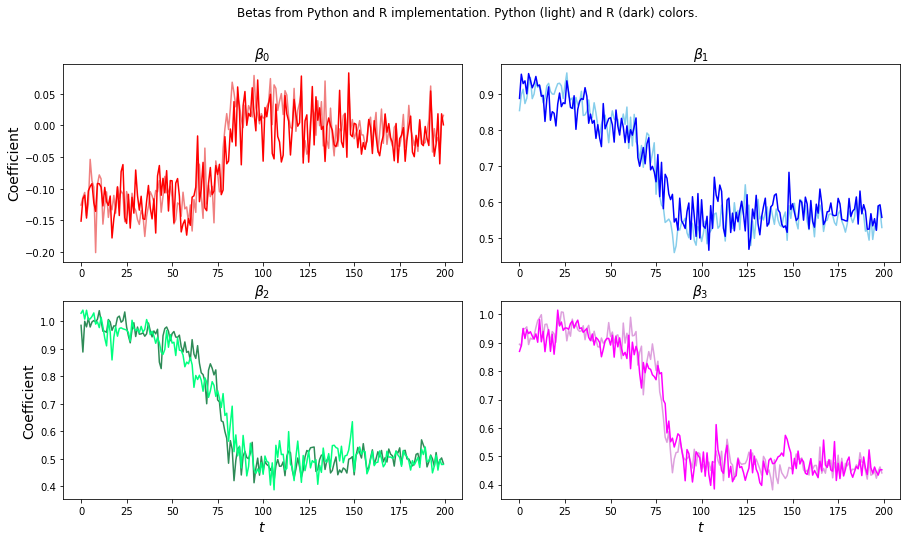

In [62]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation. Python (light) and R (dark) colors.")

color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']


ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

Text(0.5, 1.0, 'R versus Python implementation: average of forecasts')

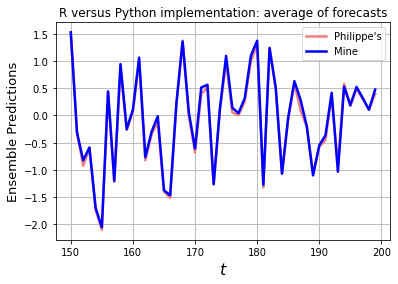

In [14]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
ax.plot(phils_preds.mean(axis =0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("R versus Python implementation: average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)

In [15]:
beta_draws = np.stack(
            [np.zeros(shape=(3,3))]*2)

In [16]:
beta_draws[2]

IndexError: index 2 is out of bounds for axis 0 with size 2